C:\Users\declan\AppData\Local\Temp\ipykernel_19536\729714629.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(zone_dict))
C:\Users\declan\AppData\Local\Temp\ipykernel_19536\729714629.py:40: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_mean, z_mean, color=colors(i), edgecolor='black', s=100, marker='x')


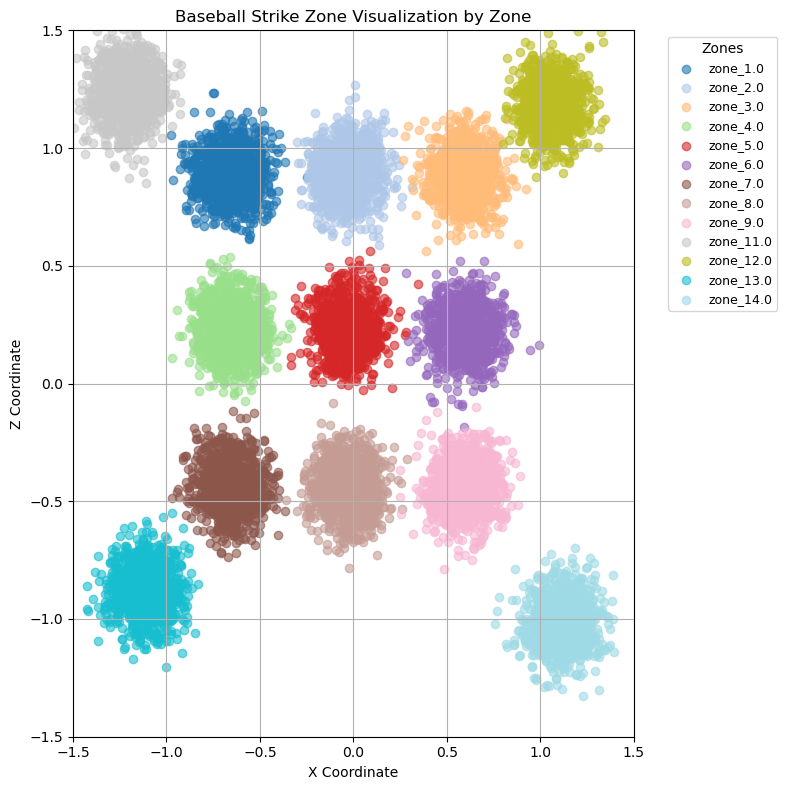

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Strike zone data
zone_dict = {
    'zone_1.0': (-0.6572349473118423, 0.892899239419294),
    'zone_2.0': (-0.03432253664593591, 0.8910919214190797),
    'zone_3.0': (0.5852495660784874, 0.8859657088833073),
    'zone_4.0': (-0.6564154679604588, 0.23197441811777655),
    'zone_5.0': (-0.03155595451006655, 0.22522671713550563),
    'zone_6.0': (0.5915039666769759, 0.22314095055561453),
    'zone_7.0': (-0.653780481310987, -0.43381998701015306),
    'zone_8.0': (-0.027818553516266165, -0.4425700473672334),
    'zone_9.0': (0.5968830080223337, -0.44276759893508805),
    'zone_11.0': (-1.2129912880279012, 1.235131634680261),
    'zone_12.0': (1.0565517224706997, 1.1849209908776233),
    'zone_13.0': (-1.1133392330690446, -0.8713371885520418),
    'zone_14.0': (1.124543137956264, -1.0047097632356168)
}

# Number of sample points per zone
n_samples = 1000

# Generate the plot
plt.figure(figsize=(8, 8))

# Set different colors for each zone
colors = plt.cm.get_cmap('tab20', len(zone_dict))

# Loop through each zone and generate random points around the mean (x, z)
for i, (zone, (x_mean, z_mean)) in enumerate(zone_dict.items()):
    # Sample points around the mean using normal distribution
    x_samples = np.random.normal(loc=x_mean, scale=0.1, size=n_samples)
    z_samples = np.random.normal(loc=z_mean, scale=0.1, size=n_samples)
    
    # Plot each zone's points with a different color
    plt.scatter(x_samples, z_samples, color=colors(i), label=zone, alpha=0.6)

    # Optionally, plot the zone mean point as a large dot
    plt.scatter(x_mean, z_mean, color=colors(i), edgecolor='black', s=100, marker='x')

# Label the axes and add legend
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')
plt.title('Baseball Strike Zone Visualization by Zone')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Zones", fontsize=9)
plt.grid(True)

# Set axis limits to fit the strike zone
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Display the plot
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from datetime import datetime, timedelta
import sys
sys.path.append('../../')
from DataProc.DataProcessor import DataProcessor
from Datasets.BaseballDataset import BaseballDataset

In [28]:
med = pd.read_csv('../../data/med_train_94.csv')

In [29]:
med

,pitch_number,launch_speed,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,pfx_x,pfx_z,...,balls_0,balls_1,balls_2,balls_3,strikes_0,strikes_1,strikes_2,outs_when_up_0,outs_when_up_1,outs_when_up_2
0,3,-1.413039,2017-08-07,1.178783,-0.564809,-0.632717,460086,592815,-1.101258,0.221321,...,True,False,False,False,False,False,True,False,False,True
1,2,-0.002704,2017-08-07,-0.149664,-0.638660,-1.055369,460086,592815,-0.218896,-1.278947,...,True,False,False,False,False,True,False,False,False,True
2,1,-0.403242,2017-08-07,1.128966,-0.533158,-0.248489,460086,592815,-1.372753,0.542807,...,True,False,False,False,True,False,False,False,False,True
3,5,-0.002704,2017-08-07,-1.511322,-0.654486,-0.786409,444876,592815,0.720027,-2.216615,...,False,True,False,False,False,False,True,False,True,False
4,4,-0.002704,2017-08-07,1.261811,-0.612285,-0.555872,444876,592815,-1.157819,0.489226,...,True,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492987,1,-0.002704,2017-04-02,1.593923,-0.232475,-1.401175,592178,593372,-1.304879,0.020392,...,True,False,False,False,True,False,False,True,False,False
492988,4,1.603887,2017-04-02,-0.697648,-0.243025,-0.940100,656941,593372,1.387454,-1.118204,...,False,False,True,False,False,True,False,True,False,False
492989,3,-0.002704,2017-04-02,1.411261,-0.279951,-1.343541,656941,593372,-1.372753,-0.153746,...,False,True,False,False,False,True,False,True,False,False
492990,2,-0.002704,2017-04-02,1.178783,-0.274676,-0.767197,656941,593372,-1.655562,0.234716,...,False,True,False,False,True,False,False,True,False,False


In [25]:
med.shape

(492992, 93)

In [26]:
med.columns

Index(['pitch_number', 'launch_speed', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'batter', 'pitcher', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'hc_x', 'hc_y', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'sz_top', 'sz_bot', 'launch_angle', 'release_spin_rate',
       'release_extension', 'game_pk', 'release_pos_y', 'at_bat_number',
       'batter_name', 'pitcher_name', 'events_B', 'events_S', 'events_double',
       'events_field_out', 'events_hit_by_pitch', 'events_home_run',
       'events_single', 'events_strikeout', 'events_triple', 'events_walk',
       'zone_1.0', 'zone_2.0', 'zone_3.0', 'zone_4.0', 'zone_5.0', 'zone_6.0',
       'zone_7.0', 'zone_8.0', 'zone_9.0', 'zone_11.0', 'zone_12.0',
       'zone_13.0', 'zone_14.0', 'pitch_type_CH', 'pitch_type_CS',
       'pitch_type_CU', 'pitch_type_EP', 'pitch_type_FA', 'pitch_type_FC',
       'pitch_type_FF', 'pitch_type_FO', 'pitch_type_FS', 'pitch_type_KC',
       'pitch_type_KN', 'pitch_type_PO', 'pitch_

In [6]:
dataset = BaseballDataset(med, "../../data/configv3.json", 200)

In [16]:
dataset.label_and_mask_indices

tensor([ 0,  8,  9, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 85, 86])

In [17]:
dataset.label_columns

['events', 'launch_speed', 'hit_location', 'hc_x', 'hc_y', 'launch_angle']

In [27]:
dataset.categorical_label_indices

[tensor([21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 tensor([65, 66, 67, 68, 69, 70, 71, 72, 73, 74])]